In [31]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
images,labels=[],[]
for i in os.listdir('CT Images'):
    b=os.listdir(os.path.join('CT Images',i))
    for j in b:
        path=os.path.join('CT Images',i,j)
        img=cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img=cv2.resize(img,(80,80))
            images.append(resized_img)
            labels.append(i)

Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path
Wrong path


In [3]:
images[0]

array([[[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]]

In [4]:
labels[:10]

['AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT',
 'AbdomenCT']

In [5]:
df=pd.DataFrame(data=labels,columns=['labels'])

In [6]:
df.head()

,labels
0,AbdomenCT
1,AbdomenCT
2,AbdomenCT
3,AbdomenCT
4,AbdomenCT


In [7]:
print('Number of images in dataset:',len(images))
print('Number of classes:',df['labels'].nunique())

Number of images in dataset: 29991
Number of classes: 6


In [8]:
images,labels=shuffle(images,labels)

In [9]:
labels[:10]

['Hand',
 'CXR',
 'Hand',
 'BreastMRI',
 'BreastMRI',
 'AbdomenCT',
 'CXR',
 'AbdomenCT',
 'CXR',
 'BreastMRI']

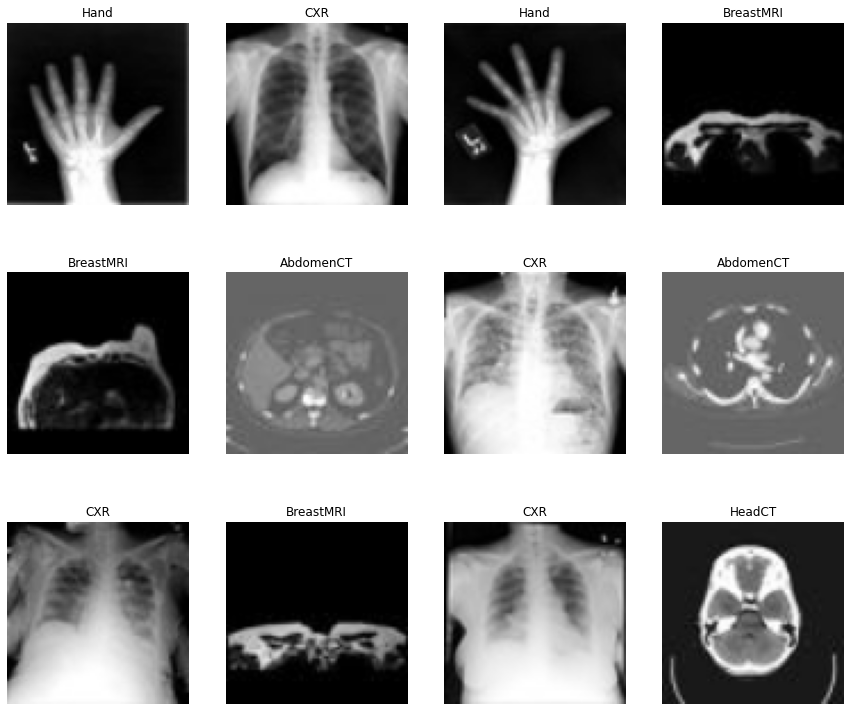

In [10]:
plt.figure(figsize=(15,13))
for i in range(0,12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

In [11]:
le=LabelEncoder()
labels_le=le.fit_transform(labels)
labels_le[:10]

array([4, 2, 4, 1, 1, 0, 2, 0, 2, 1], dtype=int64)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(images,labels_le,test_size=0.2,random_state=101,stratify=labels_le,
                                              shuffle=True)

In [13]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [14]:
X_train.shape

(23992, 80, 80, 3)

In [15]:
X_test.shape

(5999, 80, 80, 3)

In [16]:
X_train=X_train/255

In [17]:
X_test=X_test/255

In [19]:
X_train[0]

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.06666667, 0.06666667, 0.06666667],
        [0.07058824, 0.07058824, 0.07058824],
        [0.07843137, 0.07843137, 0.07843137]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667]],

       ...,

       [[0.11764706, 0.11764706, 0.11764706],
        [0.11372549, 0.11372549, 0.11372549],
        [0.10980392, 0

In [21]:
i=Input(shape=(80,80,3))
x=Conv2D(32,(3,3),padding='same',activation='relu')(i)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Conv2D(16,(3,3),padding='same',activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dropout(0.4)(x)
x=Dense(64,activation='relu')(x)
x=Dense(6,activation='softmax')(x)
model=Model(inputs=i,outputs=x)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [23]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 80, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,574 (1.59 MB)

 Trainable params: 415,574 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [26]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9312 - loss: 0.2028 - val_accuracy: 0.9967 - val_loss: 0.0167
Epoch 2/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.9971 - loss: 0.0127 - val_accuracy: 0.9967 - val_loss: 0.0207
Epoch 3/100
675/675 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9971 - val_loss: 0.0171


In [28]:
model.evaluate(X_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9983 - loss: 0.0099


[0.009286068379878998, 0.9983330368995667]

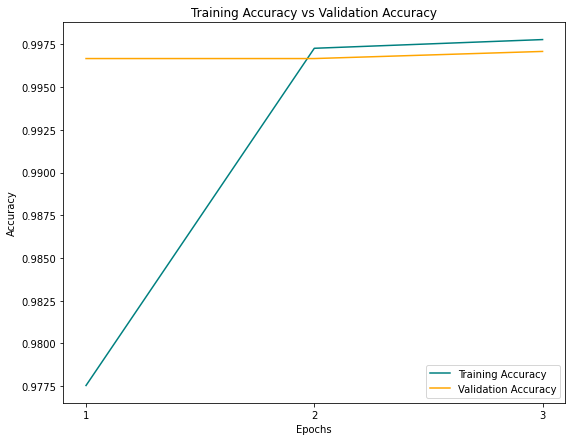

In [29]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='orange')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xticks([0,1,2],[1,2,3])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

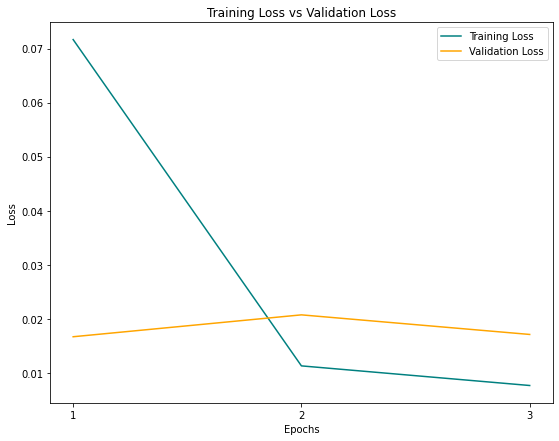

In [30]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='teal')
plt.plot(history.history['val_loss'],label='Validation Loss',color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xticks([0,1,2],[1,2,3])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
y_pred=model.predict(X_test)
y_predict=[np.argmax(i) for i in y_pred]
y_predict[:10]

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


[3, 5, 3, 0, 1, 2, 1, 4, 5, 4]

In [33]:
y_test[:10]

array([3, 5, 3, 0, 1, 2, 1, 4, 5, 4], dtype=int64)

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1001
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1001
           4       1.00      0.99      0.99       997
           5       1.00      1.00      1.00      1000

    accuracy                           1.00      5999
   macro avg       1.00      1.00      1.00      5999
weighted avg       1.00      1.00      1.00      5999



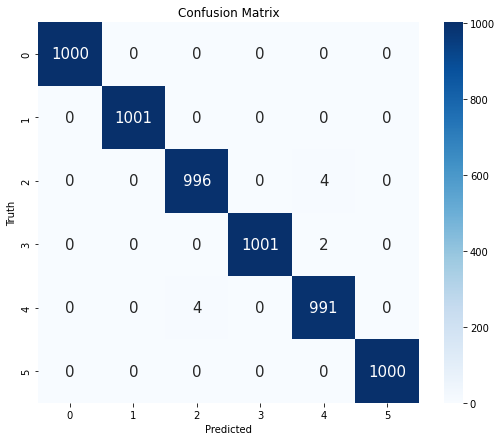

In [35]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()